<a href="https://colab.research.google.com/github/Ryansyaaw/PCVK_Ganjil_23/blob/main/week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import cv2 as cv
import numpy as np
from PIL import Image
import math
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from math import log10, sqrt
import glob

 Gamma correction pada citra 
-----------------------------
Masukkan nilai gamma: 3


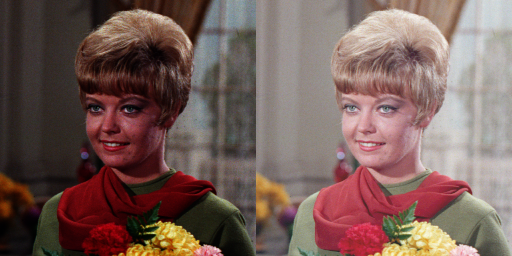

In [15]:
print(' Gamma correction pada citra ')
print('-----------------------------')
try:
  gamma = int(input('Masukkan nilai gamma: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255*(original[y,x,c]/255)**(1/gamma), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

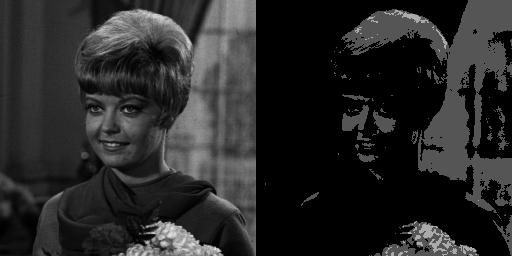

In [36]:
bit_depth=2
level = 255 / (pow(2,bit_depth)-1)
image = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(image.shape[0]):
  for x in range(image.shape[1]):
      depth_image[y,x] = int(image[y, x] / level) * int(level)

final_frame = cv.hconcat([image, depth_image])
cv2_imshow(final_frame)

27.50634680461299  db


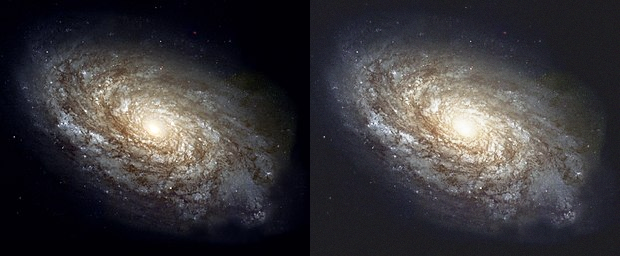

In [6]:
# Jumlah citra di Average 100
cv_img = []
for img in glob.glob('/content/drive/MyDrive/Images/noises/*.jpg'):
  n = cv.imread(img)
  cv_img.append(n)

ori = cv.imread('/content/drive/MyDrive/Images/galaxy.jpg')
noise_image = cv_img[99]

#index mulai 0
for i in range(99):
  alpha = 1.0 / (i + 1)
  beta = 1.0 - alpha
  noise_image = cv.addWeighted(cv_img[i], alpha, noise_image, beta, 0.0)

def PSNR(ori, compressed):
    mse = np.mean((ori - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = noise_image
psnr = PSNR(ori, compressed)
print(psnr , ' db')

final_frame = cv.hconcat((ori, noise_image))
cv2_imshow(final_frame)

MASKING

and

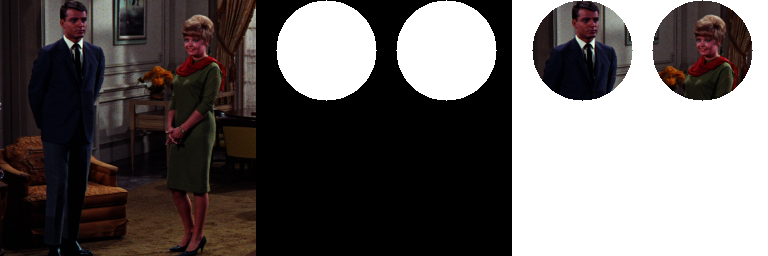

In [60]:
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

or

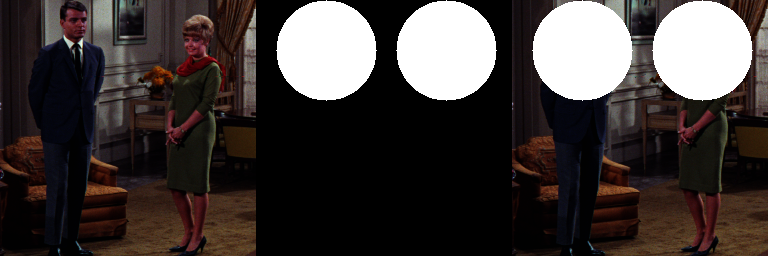

In [62]:
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = img | mask | mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

not

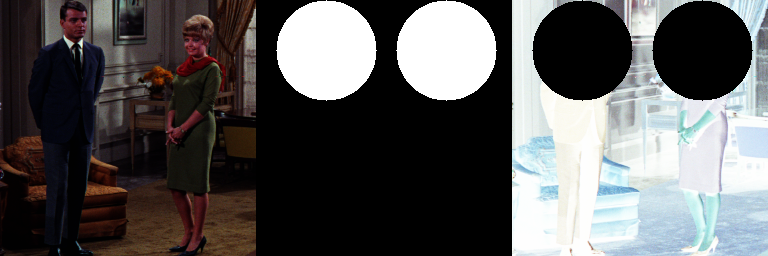

In [63]:
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & ~mask & ~mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

nand

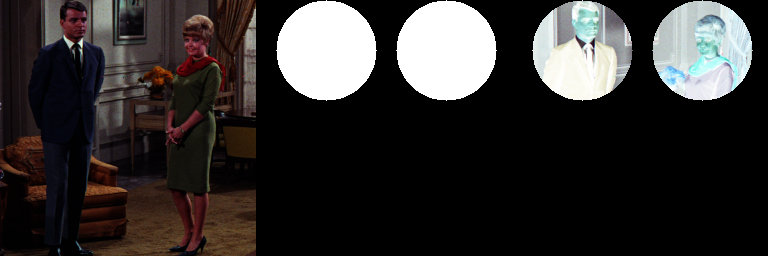

In [64]:
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img & mask & mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

xor

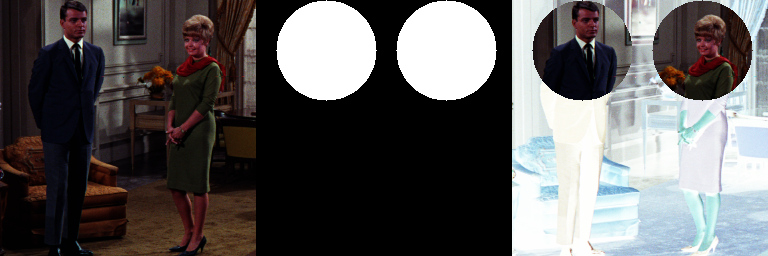

In [76]:
img = cv.imread('/content/drive/MyDrive/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 50), 50, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (190, 50), 50, (255,255,255), -1)

result = ~img ^ mask & mask2
# result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

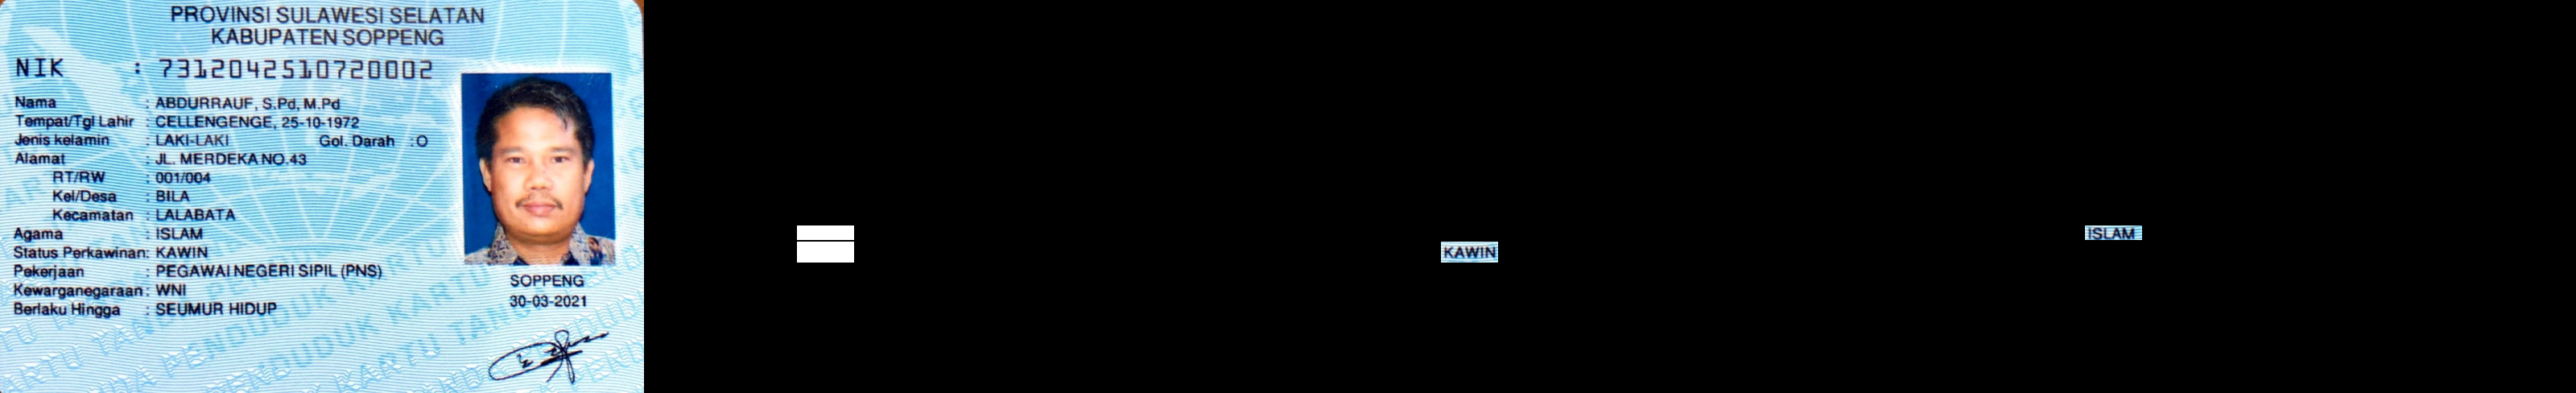

In [42]:
img = cv.imread('/content/drive/MyDrive/week2/Salinan KTP.jpeg')

mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.rectangle(mask, pt1=(190,300), pt2=(260,325), color=(255,255,255), thickness=-1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.rectangle(mask2, pt1=(190,280), pt2=(260,297), color=(255,255,255), thickness=-1)

masks = mask | mask2
result1 = img & mask
result2 = img & mask2
final_frame = cv.hconcat((img, masks, result1, result2))
path1 = '/content/drive/MyDrive/Images/result1.jpeg'
cv.imwrite(path1, result1)
path2 = '/content/drive/MyDrive/Images/result2.jpeg'
cv.imwrite(path2, result2)
cv2_imshow(final_frame)

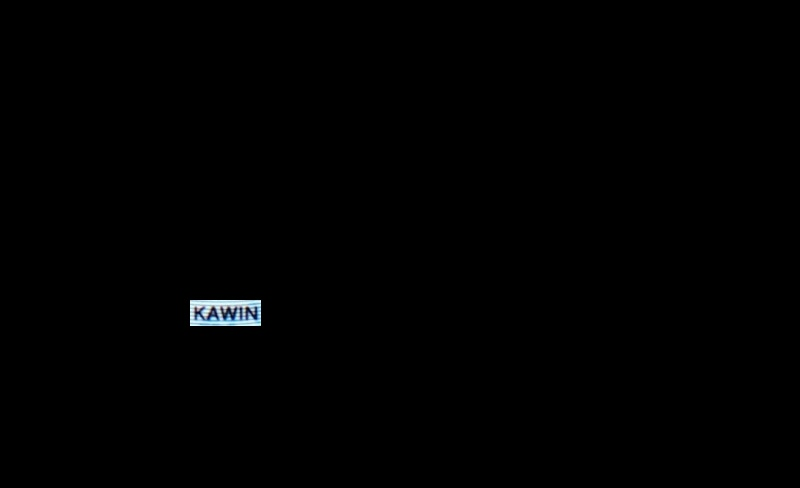

In [43]:
img = cv.imread('/content/drive/MyDrive/Images/result1.jpeg')
cv2_imshow(img)